# Graphiques Variables Officielles

## Import des packages et des données

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

%matplotlib inline

In [51]:
retail_trade = pd.read_csv('Ressources/Retail trade index.csv',sep=';').drop(range(4)).reset_index().drop('index',axis=1)
retail_trade = retail_trade.rename({'Titre :':'Date'},axis='columns').set_index('Date').replace({',':'.'},regex=True).astype('float64')

In [43]:
retail_brut = retail_trade.loc[:,[column.endswith('(Brut)') for column in retail_trade.columns]]
retail_CJO_CVS = retail_trade.loc[:,[column.endswith('(Brut)') for column in retail_trade.columns]]

In [44]:
retail_brut_valeur = retail_brut.filter(regex='indice en valeur')
retail_brut_volume = retail_brut.filter(regex='indice en volume')
retail_CJO_CVS_valeur = retail_CJO_CVS.filter(regex='indice en valeur')
retail_CJO_CVS_volume = retail_CJO_CVS.filter(regex='indice en volume')

## Graphiques simples

In [102]:
fig_retail_brut_valeur,axs = plt.Figure(),[]

for column in retail_brut_valeur.columns:
    ax = fig_retail_brut_valeur.add_subplot(list(retail_brut_valeur.columns).index(column)+1,1,list(retail_brut_valeur.columns).index(column)+1)
    axs.append(ax)

In [103]:
for ax in axs:
    ax.hist(retail_brut_valeur.iloc[:,axs.index(ax)])

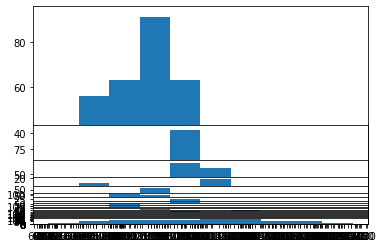

In [104]:
fig_retail_brut_valeur